# complete using Transfer learning

### Import Required Libraries and Modules

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
import tensorflow_hub as hub

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from skimage.transform import resize
from sklearn import metrics
from tensorflow.keras import Sequential,layers

### collect paths



In [3]:
mask=glob('with_mask/*.jpg')[0:500]
nomask=glob('without_masks/*.jpg')[0:500]

### define classes amd labels



In [4]:
len(mask)

500

In [5]:
dic={0:'with_mask',1:'without_masks'}

### load and label images for each category

In [6]:
labels=[]
images=[]

for i in mask:
    img=plt.imread(i)
    images.append(img)
    labels.append(0)
    
for i in nomask:
    img=plt.imread(i)
    images.append(img)
    labels.append(1)

### plot images

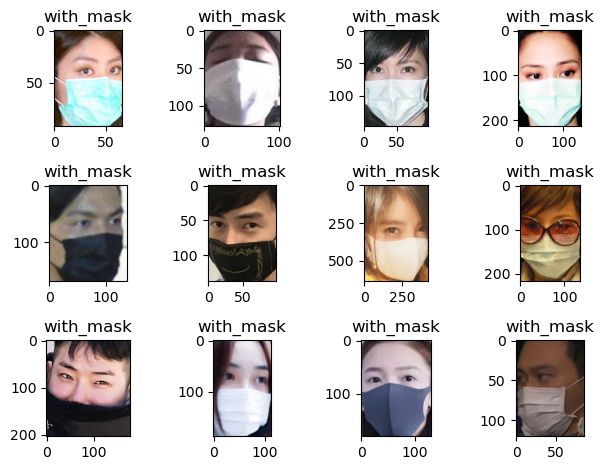

In [7]:
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(images[i])
    plt.title(dic[labels[i]])
plt.tight_layout()

### shuffle

In [8]:
images,labels=shuffle(images,labels)

### plot images

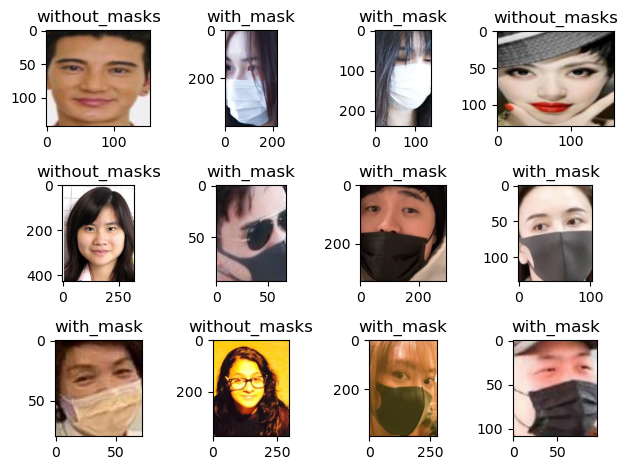

In [9]:
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(images[i])
    plt.title(dic[labels[i]])
plt.tight_layout()

### resize images

In [10]:
X=[]
for i in images:
    X.append(resize(i,(224,224,3)))

### plot after resizing

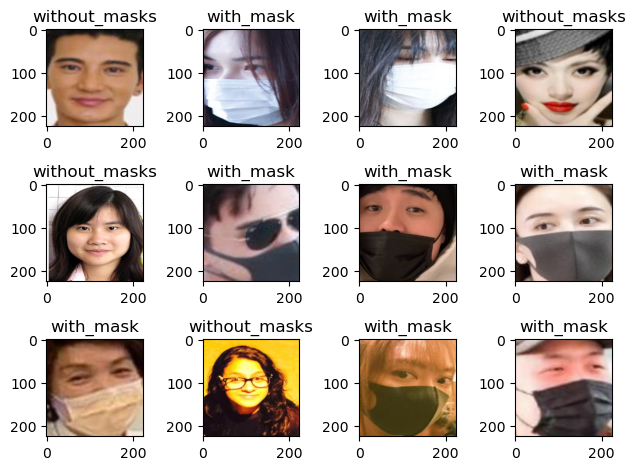

In [11]:
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X[i])
    plt.title(dic[labels[i]])
plt.tight_layout()

### convert into numpy

In [12]:
X=np.array(X)
y=np.array(labels)

### spit the data

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

### MobileNetV2 Pre-trained Feature Extractor Model URL 
* "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [14]:
f="https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

### Load Pre-trained MobileNetV2 Feature Extractor Model

In [16]:
hub.load(f)

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x1a38f486450>

### Define Number of Output Classes

In [17]:
n=2

### Instantiate MobileNetV2 without Top Layer as Feature Extractor

In [18]:
top_layer=hub.KerasLayer(f,input_shape=(224,224,3),trainable=False)

### build model

In [20]:
model=Sequential([
    top_layer,
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(14,activation='relu'),
    layers.Dense(n,activation='sigmoid')
])

### compile

In [23]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

### train



In [24]:
model.fit(X_train,y_train,epochs=10,validation_split=0.05)

Epoch 1/10



24/24 [==============================] - 19s 565ms/step - loss: 0.2381 - accuracy: 0.9013 - val_loss: 0.0395 - val_accuracy: 0.9750
Epoch 2/10
24/24 [==============================] - 12s 498ms/step - loss: 0.0287 - accuracy: 0.9921 - val_loss: 0.0785 - val_accuracy: 0.9750
Epoch 3/10
24/24 [==============================] - 12s 495ms/step - loss: 0.0094 - accuracy: 0.9987 - val_loss: 0.0206 - val_accuracy: 1.0000
Epoch 4/10
24/24 [==============================] - 12s 497ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0199 - val_accuracy: 1.0000
Epoch 5/10
24/24 [==============================] - 12s 520ms/step - loss: 0.0034 - accuracy: 0.9987 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 6/10
24/24 [==============================] - 12s 521ms/step - loss: 0.0050 - accuracy: 0.9961 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 12s 519ms/step - loss: 0.0049 - accuracy: 0.9974 - val_loss: 0.0114 - val_accuracy: 1.0000
Epoch 8/10

### model prediction

In [31]:
y_pred=model.predict(X_test)

7/7 [==============================] - 3s 416ms/step


In [33]:
y_pred[0]

array([5.1321904e-04, 9.9539912e-01], dtype=float32)

### accuracy score

In [34]:
y_pred=[np.argmax(i) for i in y_pred]

In [35]:
metrics.accuracy_score(y_test,y_pred)

1.0

### confusion matrix

<Axes: >

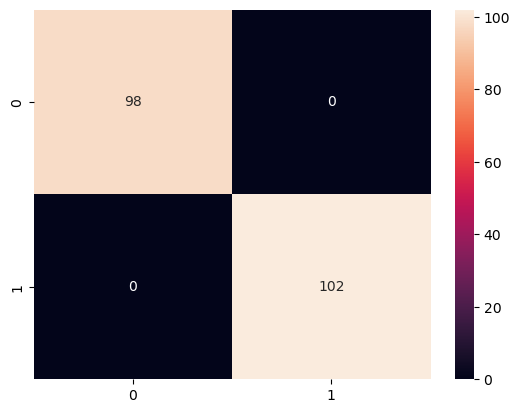

In [38]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True,fmt='d')

### classification report

In [39]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       102

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

